## Understanding Conv filters and visualizing output

In [103]:
import tensorflow as tf
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

## Convolution layer

> Tensorflow has **1D,2D** and **3D** convolutions. The dimension of CNN represents the **kernel dimension**. Eg, For 2D Conv, we have a 2D kernel

> The **shape of 2D kernel** is **(H,W,C,NumFilters)** and **bias** is **(NumFilters,)**

```bash
    tf.layers.conv2d(
        inputs, #Should be 4D (B,H,W,C)
        filters, #Specify num filters
        kernel_size, #2D
        strides=(1, 1), 
        padding='valid', #VALID : No zero padding; SAME:Zero padding
        data_format='channels_last',
        dilation_rate=(1, 1),
        activation=None,
        use_bias=True,
        kernel_initializer=None,
        bias_initializer=tf.zeros_initializer(),
        kernel_regularizer=None,
        bias_regularizer=None,
        activity_regularizer=None,
        kernel_constraint=None,
        bias_constraint=None,
        trainable=True,
        name=None,
        reuse=None
    )
```


## Visualizing Conv outputs and filters

> The filters determine the operation that is done on the image

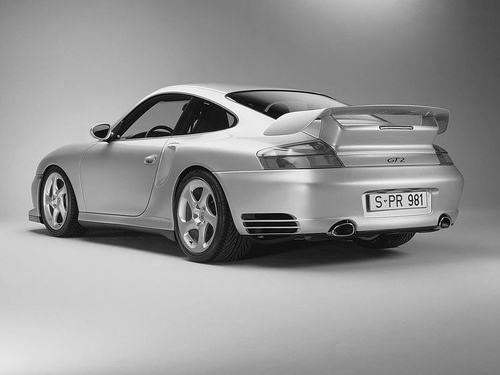

In [75]:
im = Image.open('pics/car.jpg').convert("L")
im

In [77]:
input_im = tf.constant(im)
input_im = tf.expand_dims(input_im,0)
input_im = tf.expand_dims(input_im,-1)
input_im = tf.image.convert_image_dtype(input_im,tf.float32)
input_im.shape

TensorShape([Dimension(1), Dimension(375), Dimension(500), Dimension(1)])

**Check the shape of Kernel and bias**

> **W** : (H,W,C,N)

> **b** : (N,)

In [104]:
conv2d = tf.layers.conv2d(input_im,filters=15,kernel_size=(4,4),strides=(1,1))

In [105]:
tf.get_collection(tf.GraphKeys.GLOBAL_VARIABLES,scope=conv2d.name.split('/')[0])

[<tf.Variable 'conv2d_18/kernel:0' shape=(4, 4, 1, 15) dtype=float32_ref>,
 <tf.Variable 'conv2d_18/bias:0' shape=(15,) dtype=float32_ref>]

### Kernel that detects edges

In [80]:
outline_kernel = np.array([[-1.,-1.,-1.],[-1.,8.,-1.],[-1.,-1.,-1.]])
outline_kernel = outline_kernel.reshape(3,3,1,1)
#outline_kernel = np.concatenate((outline_kernel,outline_kernel,outline_kernel),axis=2)
print(outline_kernel.shape)
outline_kernel

(3, 3, 1, 1)


array([[[[-1.]],

        [[-1.]],

        [[-1.]]],


       [[[-1.]],

        [[ 8.]],

        [[-1.]]],


       [[[-1.]],

        [[-1.]],

        [[-1.]]]])

In [81]:
kernel_init = tf.initializers.constant(outline_kernel)
conv2d = tf.layers.conv2d(input_im,filters=1,kernel_size=(3,3),strides=(1,1),kernel_initializer=kernel_init)

In [82]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    o = sess.run(conv2d)

In [83]:
o.shape

(1, 373, 498, 1)

**Conv output**

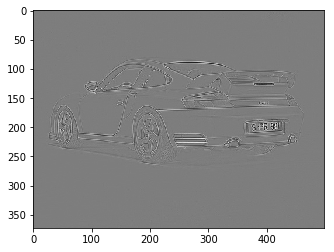

In [85]:
plt.imshow(o[0,:,:,0],cmap='gray') #o[0].reshape(373,-1) also works

**Filter**

In [106]:
outline_kernel.shape

(3, 3, 1, 1)

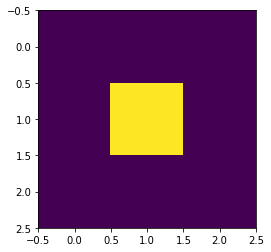

In [102]:
plt.imshow(outline_kernel[:,:,0,0])

### Kernel that emboss image

In [92]:
emboss_kernel = np.array([[-2.,-1.,0.],[-1,1,1],[0,1,2]])
emboss_kernel = emboss_kernel.reshape(3,3,1,1)

In [99]:
kernel_init = tf.initializers.constant(emboss_kernel)
conv2d = tf.layers.conv2d(input_im,filters=1,kernel_size=(3,3),strides=(2,2),kernel_initializer=kernel_init)

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    o = sess.run(conv2d)

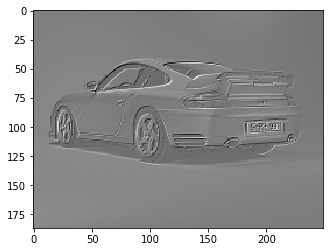

In [100]:
plt.imshow(o[0,:,:,0],cmap='gray')

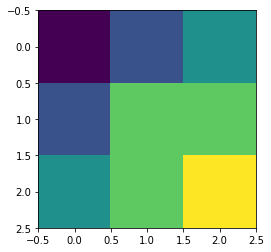

In [101]:
plt.imshow(emboss_kernel[:,:,0,0])